In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

Loading the data file

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,patient_no,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_no  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [4]:
df.shape

(303, 15)

# Null value detection

In [5]:
df[df.isnull().any(axis=1)]

,patient_no,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


It is always good to have zero null values.

# Duplicate record detection

In [6]:
df.duplicated().sum()

0

In [7]:
df.loc[df.duplicated(),:]

,patient_no,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [8]:
df.drop_duplicates(keep = 'first', inplace = True)

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.shape

(303, 15)

In [11]:
df.describe()

,patient_no,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,1.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,152.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,227.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,303.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.corr()

,patient_no,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
patient_no,1.000000,0.185153,0.201132,-0.399163,0.108507,0.020258,0.000743,-0.021130,-0.404972,0.363788,0.298161,-0.276484,0.384962,0.257403,-0.862585
age,0.185153,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,0.201132,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.399163,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.108507,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.020258,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.000743,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.021130,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.404972,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.363788,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757


# Outlier Detection

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

patient_no    151.0
age            13.5
sex             1.0
cp              2.0
trestbps       20.0
chol           63.5
fbs             0.0
restecg         1.0
thalach        32.5
exang           1.0
oldpeak         1.6
slope           1.0
ca              1.0
thal            1.0
target          1.0
dtype: float64


C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

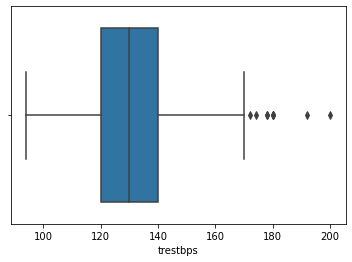

In [14]:
sns.boxplot(df['trestbps'])

C:\Users\shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

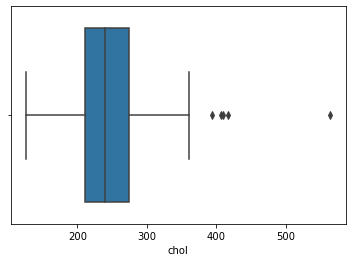

In [15]:
sns.boxplot(df['chol'])

In [16]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
df_outlier_trest = df[(df['trestbps'] < (Q1 - 1.5 * IQR)) |(df['trestbps'] > (Q3 + 1.5 * IQR))].index
print(df_outlier_trest)

Int64Index([8, 101, 110, 203, 223, 241, 248, 260, 266], dtype='int64')


In [17]:
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
df_outlier = df[(df['chol'] < (Q1 - 1.5 * IQR)) |(df['chol'] > (Q3 + 1.5 * IQR))].index
print(df_outlier)

Int64Index([28, 85, 96, 220, 246], dtype='int64')


In [18]:
df.dtypes

patient_no      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
target          int64
dtype: object

# Performing EDA

In [19]:
for column in df.columns:
    if (df[column].dtype) == 'object':
        print(column ,'is categoical')

As the dtype of all the column is int or float but some columns data shows categorical in nature. So, finding the categorical columns

In [20]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
print(categorical_val)

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


Converting the datatype of categorical variable to object

In [21]:
categorical_val = {'sex' : object,
                   'cp' : object,
                   'fbs' : object,
                   'restecg' : object,
                   'exang' : object,
                   'slope' : object,
                   'ca' : object,
                   'thal' : object,
                   'target' : object
                   }
  
df = df.astype(categorical_val)
print(df.dtypes)

patient_no      int64
age             int64
sex            object
cp             object
trestbps        int64
chol            int64
fbs            object
restecg        object
thalach         int64
exang          object
oldpeak       float64
slope          object
ca             object
thal           object
target         object
dtype: object


Text(0.5, 1.0, 'Heart Disease count')

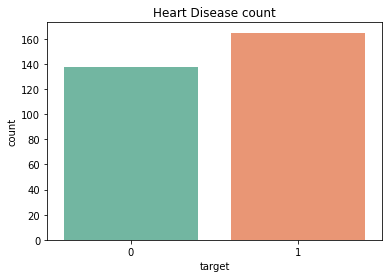

In [22]:
sns.countplot(x ='target', data = df, palette= 'Set2')
plt.title("Heart Disease count")

Above plot has the count of heart disease where person with heart disease = 1 and without heart disease = 0.

Text(0.5, 1.0, 'Heart Disease based on chest pain')

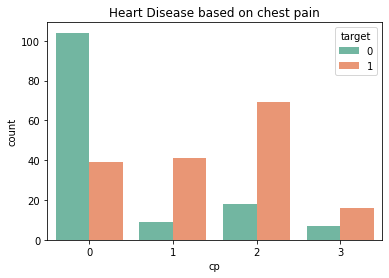

In [23]:
sns.countplot(x ='cp', data = df , palette = 'Set2', hue = 'target')
plt.title("Heart Disease based on chest pain")

Text(0.5, 1.0, 'Heart Disease by fasting blood pressure')

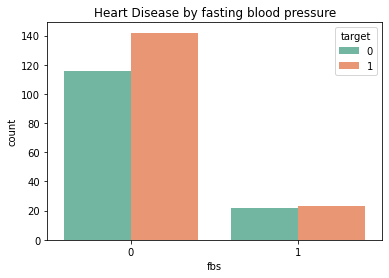

In [24]:
sns.countplot(x ='fbs', data = df, palette= 'Set2' , hue = 'target')
plt.title("Heart Disease by fasting blood pressure")

Text(0.5, 1.0, 'Heart Disease based on resting blood pressure')

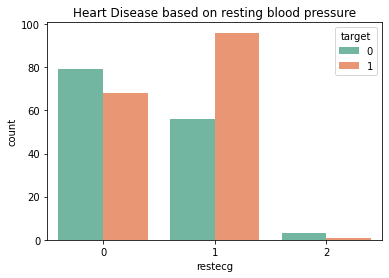

In [25]:
sns.countplot(x ='restecg', data = df, hue = 'target' , palette= 'Set2')
plt.title("Heart Disease based on resting blood pressure")

Text(0.5, 1.0, 'Heart Disease based on exercise induced angina')

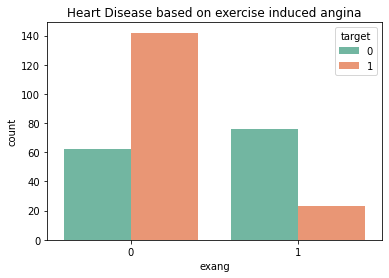

In [26]:
sns.countplot(x ='exang', data = df, hue = 'target' , palette= 'Set2')
plt.title('Heart Disease based on exercise induced angina')

<AxesSubplot:xlabel='slope', ylabel='count'>

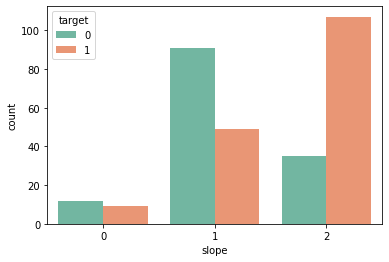

In [27]:
sns.countplot(x ='slope', data = df, hue = 'target' , palette= 'Set2')

Text(0.5, 1.0, 'Heart Disease based on number of major vessels (0-3) colored by flourosopy')

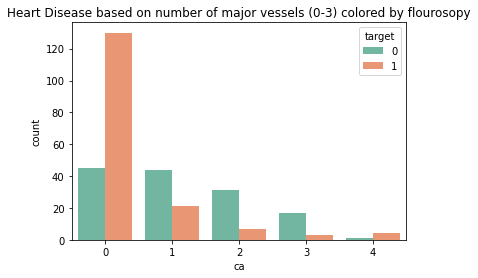

In [28]:
sns.countplot(x ='ca', data = df, hue = 'target' , palette= 'Set2')
plt.title('Heart Disease based on number of major vessels (0-3) colored by flourosopy')

# Bivariate Analysis of heart attack

<AxesSubplot:xlabel='age', ylabel='thalach'>

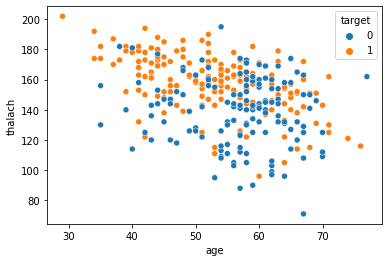

In [29]:
sns.scatterplot(data = df, x = 'age',y = 'thalach', hue = 'target')

Above plot indicates that 45-60 age group have heart diease.

In [30]:
Q1 = df['trestbps'].quantile(0.25)
Q3 = df['trestbps'].quantile(0.75)
IQR = Q3 - Q1
df_outlier_trest = df.iloc[df[(df['trestbps'] < (Q1 - 1.5 * IQR)) | (df['trestbps'] > (Q3 + 1.5 * IQR))].index]
df_outlier_trest

,patient_no,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,102,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,111,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,204,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,224,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,242,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,249,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,261,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,267,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


<AxesSubplot:xlabel='trestbps', ylabel='thalach'>

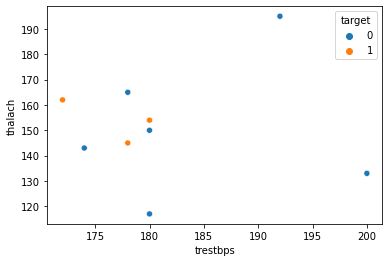

In [31]:
sns.scatterplot(data = df_outlier_trest, x = 'trestbps', y = 'thalach', hue = 'target')

correlation for the outliers in the trestbps field

Text(0.5, 1.0, 'Heart disease count based on gender(male = 1, female = 0)')

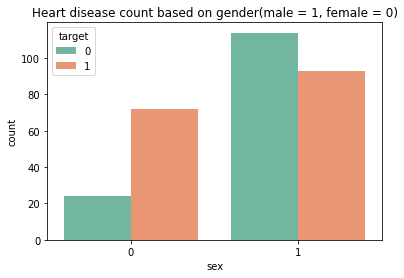

In [32]:
sns.countplot(data = df, x ='sex', palette= 'Set2' , hue = 'target')
plt.title('Heart disease count based on gender(male = 1, female = 0)')

In [33]:
df['target']=df['target'].astype('int64')

In [34]:
df['chol'].corr(df['target'])

-0.08523910513756904

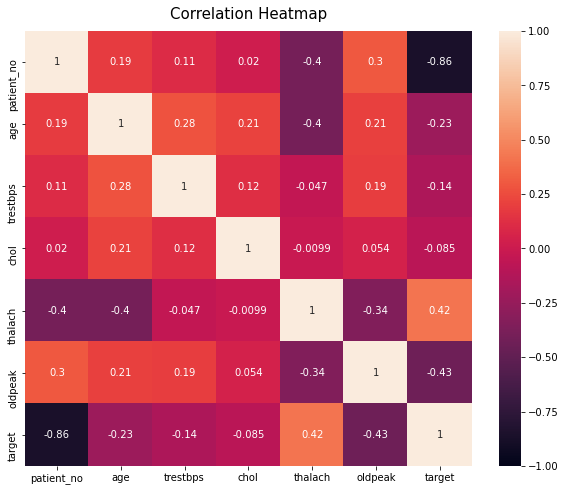

In [35]:
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

chol ( cholestrol) are the lowest correlated with the target variable. Above map shows that oldpeak has negative correlation with target. 

Text(0.5, 1.0, 'Heart Disease thalium stress result')

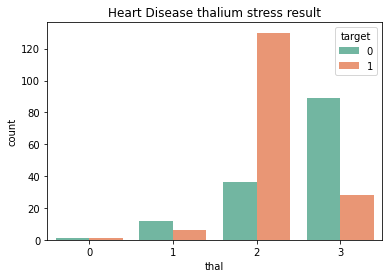

In [36]:
sns.countplot(x ='thal', data = df, hue = 'target' , palette= 'Set2')
plt.title('Heart Disease thalium stress result')

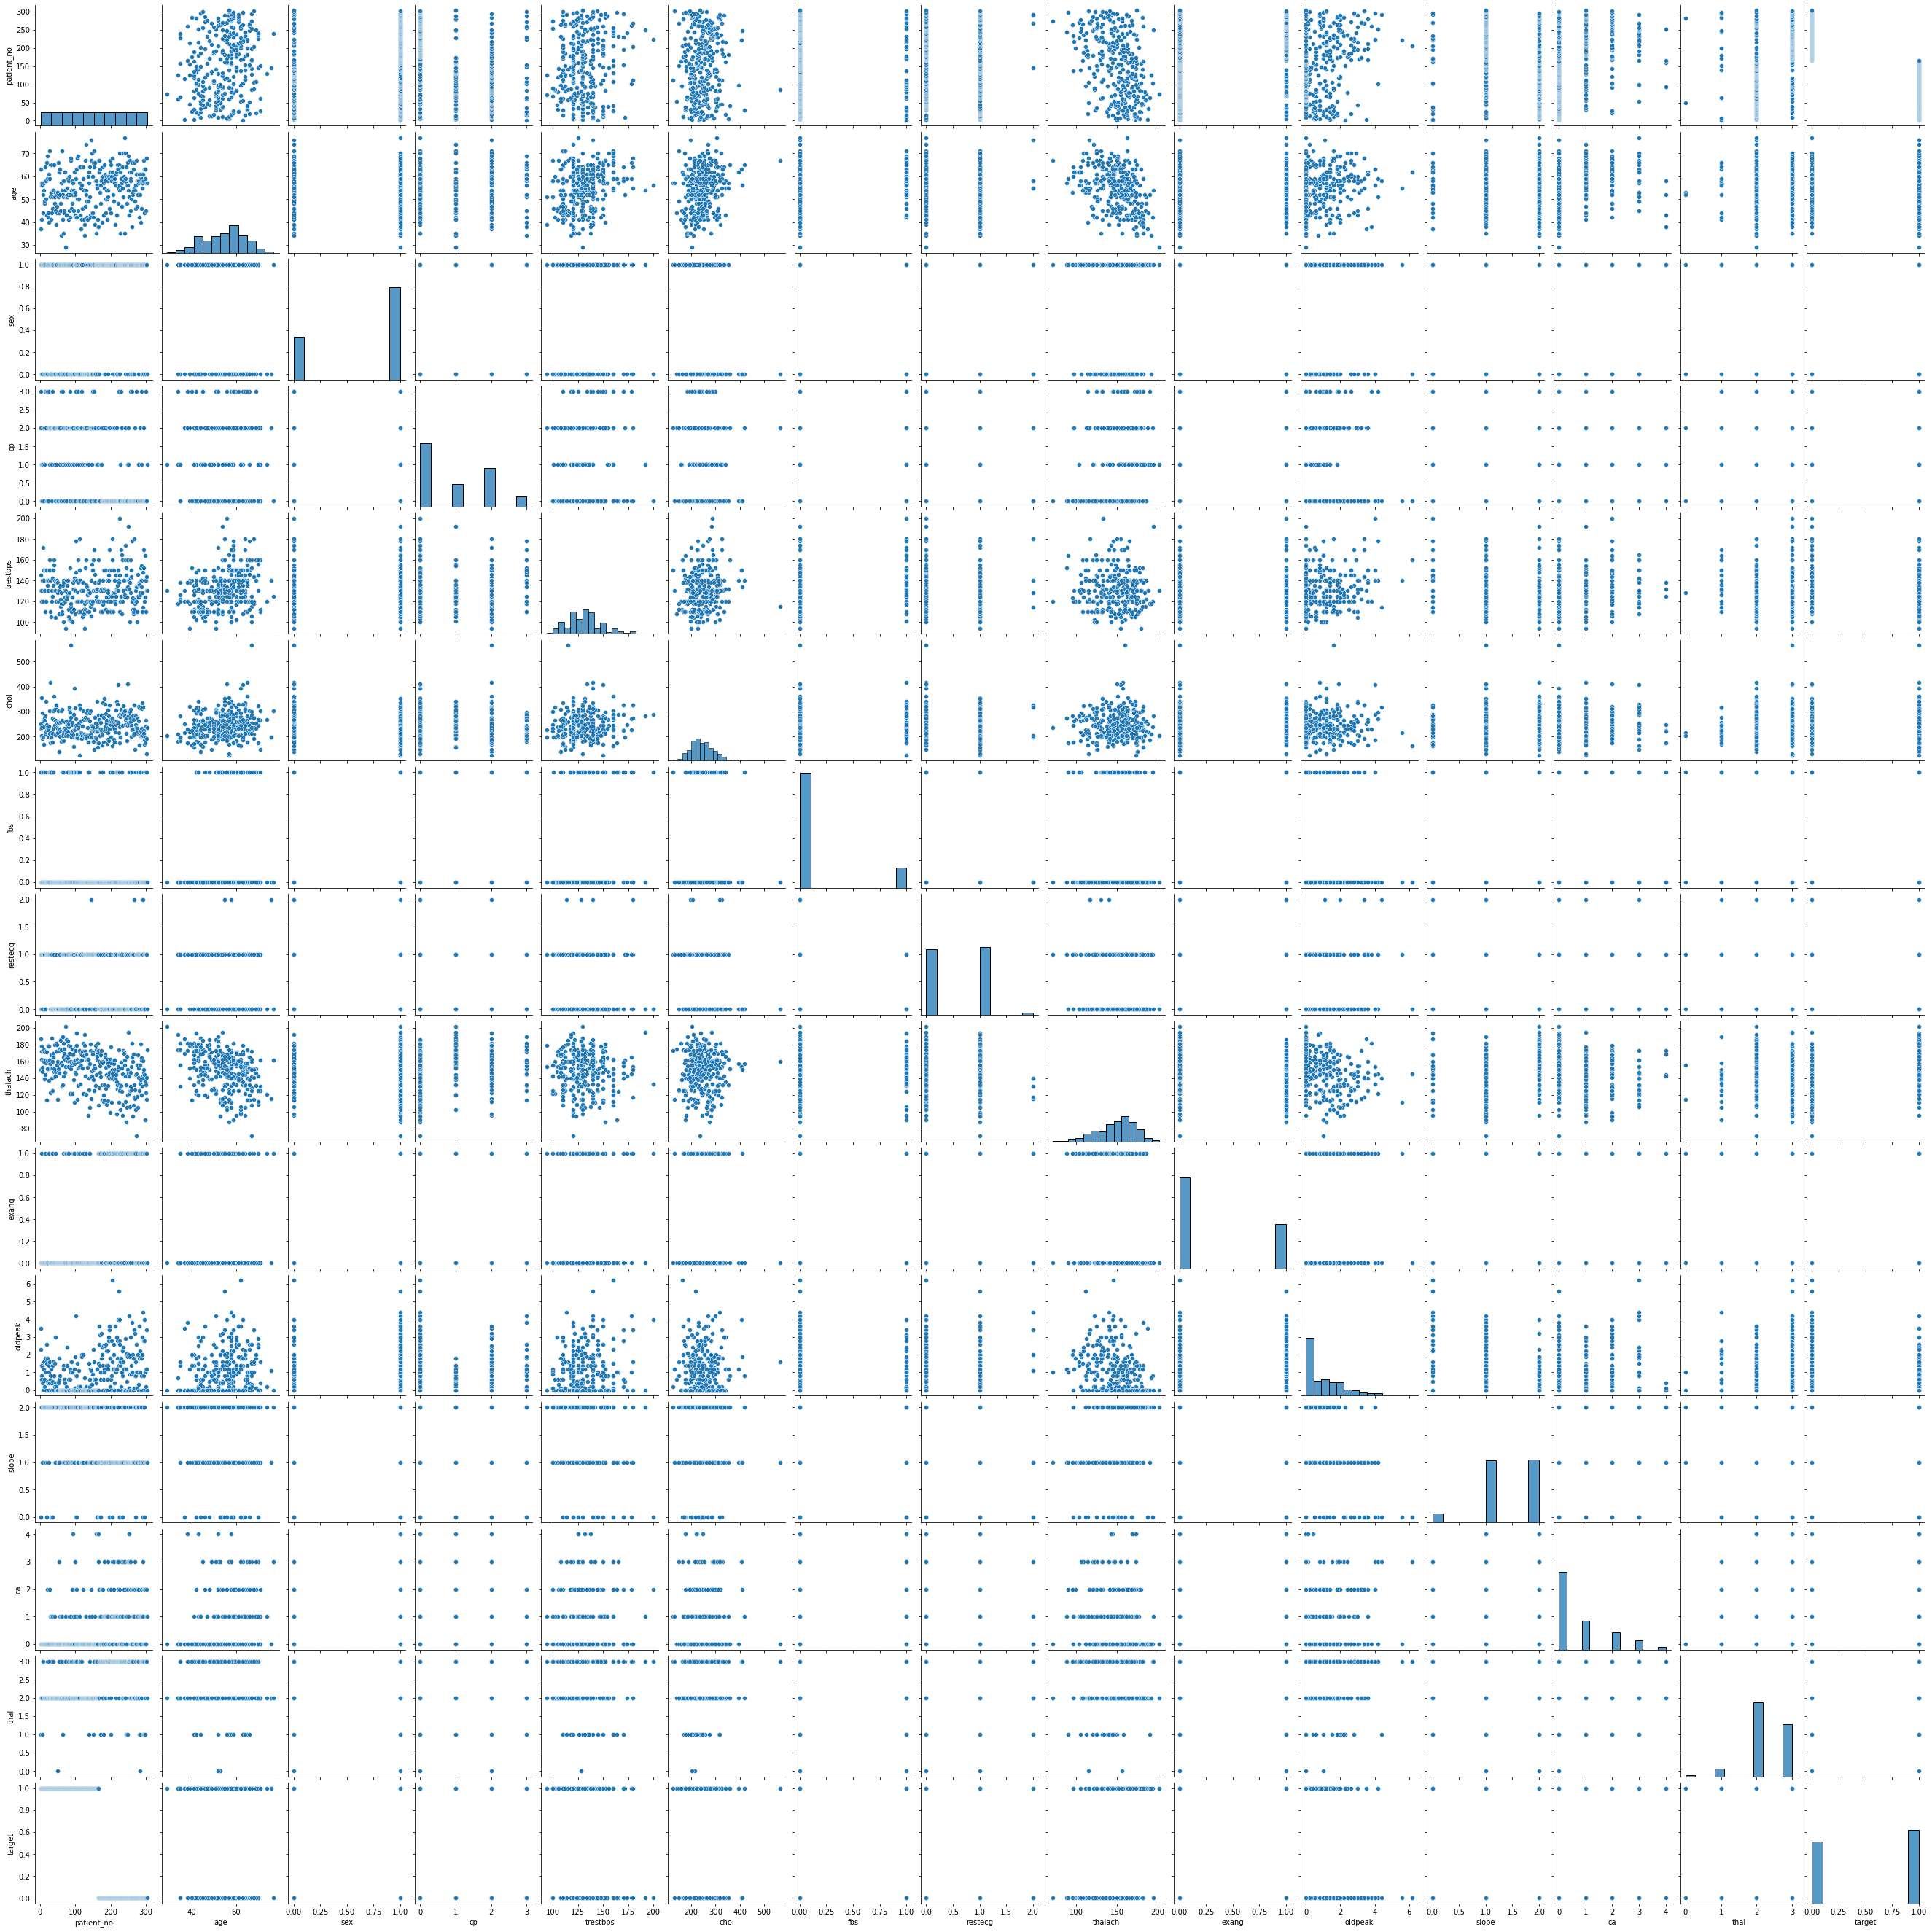

In [39]:
sns.pairplot(df)

the models do not understand categorical data so it should be converted to numeric

In [40]:
df_final = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [41]:
df_final.columns

Index(['patient_no', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0',
       'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

# Train-test split

Applying 70-30 split to dataframe where 70% is train data and 30% is test data

In [42]:
df_train, df_test = train_test_split(df_final, train_size = 0.7, random_state = 100)

In [43]:
df_train.shape , df_test.shape

((212, 32), (91, 32))

Seprating dataframe into X_train , X_test, y_train, y_test where y is the response variable

In [44]:
y_train = df_train.pop('target')
X_train = df_train
y_test = df_test.pop('target')
X_test = df_test

Logistic Regression Model building

In [45]:
logreg = LogisticRegression()

In [46]:
logreg.fit(X_train,y_train)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
y_pred = logreg.predict(X_test)

In [48]:
cnf_martix = confusion_matrix(y_test, y_pred)
cnf_martix

array([[46,  0],
       [ 1, 44]], dtype=int64)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.989010989010989
Precision: 1.0
Recall: 0.9777777777777777
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.98      0.99        45

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



The above model shows classification rate of 86%, considered as good accuracy.

Recall : Logistic Regression model can identify 81% of the time having heart attack.

Precision : Logistic Regression model predicted patients are going to suffer from heart attack, that patients have 91% of the time.